In [1]:
#This is for the Movie Mayhem Project!

In [2]:
#This is for loading the modules we want to use for the project.
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats 

In [3]:
#This is for loading the CSV and parsing into a DF
movie_dataset = pd.read_csv("MoviesOnStreamingPlatforms_updated.csv")
movie_dataset

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,16739,16740,The Ghosts of Buxley Hall,1980,NaN,6.2,NaN,0,0,0,1,0,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.0
16740,16740,16741,The Poof Point,2001,7+,4.7,NaN,0,0,0,1,0,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.0
16741,16741,16742,Sharks of Lost Island,2013,NaN,5.7,NaN,0,0,0,1,0,Neil Gelinas,Documentary,United States,English,NaN
16742,16742,16743,Man Among Cheetahs,2017,NaN,6.6,NaN,0,0,0,1,0,Richard Slater-Jones,Documentary,United States,English,NaN


In [4]:
movie_dataset = movie_dataset.set_index('ID')
movie_dataset = movie_dataset.drop(['Unnamed: 0', 'Type'], axis=1)

#Checked to see how many rows would be lost with dropping movies withour Rotten Tomatoe scores, 
#we saw it would reduce our dataset by about 11,000 rows and decided to utilize just IMDb

movie_dataset = movie_dataset.drop(['Rotten Tomatoes'], axis=1)
movie_dataset

,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime
ID,,,,,,,,,,,,,
1,Inception,2010,13+,8.8,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
2,The Matrix,1999,18+,8.7,1,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
3,Avengers: Infinity War,2018,13+,8.5,1,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
4,Back to the Future,1985,7+,8.5,1,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
5,"The Good, the Bad and the Ugly",1966,18+,8.8,1,0,1,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16740,The Ghosts of Buxley Hall,1980,NaN,6.2,0,0,0,1,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.0
16741,The Poof Point,2001,7+,4.7,0,0,0,1,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.0
16742,Sharks of Lost Island,2013,NaN,5.7,0,0,0,1,Neil Gelinas,Documentary,United States,English,NaN


In [5]:
# This block is for the team's questions

<b>Question:</b> Do movies aimed at 18+ age have a higher IMDB rating?

In [6]:
#Cleaning the data for the age analysis
movie_dataset_age_data = movie_dataset.copy()
movie_dataset_age_data_clean = movie_dataset_age_data.dropna(subset=['Age', 'IMDb'])
movie_dataset_age_data_clean

,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime
ID,,,,,,,,,,,,,
1,Inception,2010,13+,8.8,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
2,The Matrix,1999,18+,8.7,1,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
3,Avengers: Infinity War,2018,13+,8.5,1,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
4,Back to the Future,1985,7+,8.5,1,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
5,"The Good, the Bad and the Ugly",1966,18+,8.8,1,0,1,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16727,Richie Rich's Christmas Wish,1998,all,4.1,0,0,0,1,John Murlowski,"Comedy,Family",United States,English,84.0
16728,The Jungle Book: Mowgli's Story,1998,all,4.2,0,0,0,1,Nick Marck,"Adventure,Family",United States,English,77.0
16738,The Bears and I,1974,all,6.2,0,0,0,1,Bernard McEveety,"Drama,Family",United States,English,89.0


In [7]:
# Creating column to compare over 18 vs under 18 movies
movie_dataset_age_data_clean['Age Range'] = np.where(movie_dataset_age_data_clean['Age'] == '18+', '18+', 'Under 18')

# Didn't end up needed group by had to parse out data seperately
movie_dataset_age_data_clean_groupby = movie_dataset_age_data_clean.groupby('Age Range')[['IMDb']].mean()
movie_dataset_age_data_clean_groupby


over_18 = movie_dataset_age_data_clean.loc[movie_dataset_age_data_clean['Age Range'] == '18+', 'IMDb']
under_18 = movie_dataset_age_data_clean.loc[movie_dataset_age_data_clean['Age Range'] != '18+', 'IMDb']


<ipython-input-7-f3f521251126>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_dataset_age_data_clean['Age Range'] = np.where(movie_dataset_age_data_clean['Age'] == '18+', '18+', 'Under 18')


<ipython-input-19-6a5430e8baf7>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['Over 18', 'Under 18'])


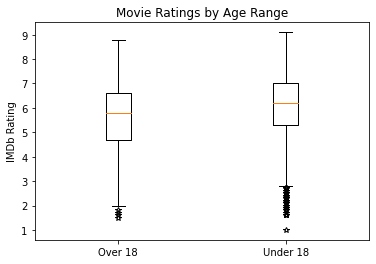

Based on the boxplot we've uncovered many outliers among both age ranges.
We will run a two Hypothesis test. 1 including outliers and 1 not including outliers


In [19]:
# Checking for outliers in Age Range data

age_range_data = [over_18, under_18]

fig1, ax1 = plt.subplots()
ax1.set_xticklabels(['Over 18', 'Under 18'])
ax1.set_ylabel("IMDb Rating")
ax1.set_title("Movie Ratings by Age Range")
ax1.boxplot(age_range_data, 0, '*')
plt.show()

print("Based on the boxplot we've uncovered many outliers among both age ranges.") 
print('We will run a two Hypothesis test. 1 including outliers and 1 not including outliers')



In [9]:
# First Age Range Hypothesis Test

# Null Hypothesis: There is no difference in IMDb ratings based on age

print('Our hypothesis is that under 18 will have higher ratings then over 18')

print('We construct a null hypothesis that states there is no difference in ratings based on age')

print("We test this null hypothesis with a Student's t-test")


print('p-value: ' +str(stats.ttest_ind(over_18, under_18, equal_var=False)[1]))

print('----------------------------------')

print('Based on the p-value, we see that the difference in ratings is statistically significant.')

print('We now believe under 18 IMDb ratings are higher than Over 18')

# Increases our confidence that under 18 has higher ratings then over 18
                

Our hypothesis is that under 18 will have higher ratings then over 18
We construct a null hypothesis that states there is no difference in ratings based on age
We test this null hypothesis with a Student's t-test
p-value: 1.7906252820190408e-48
----------------------------------
Based on the p-value, we see that the difference in ratings is statistically significant.
We now believe under 18 IMDb ratings are higher than Over 18


In [48]:
# Second Age Range Hypothesis Test, removing outliers

over_18_quartiles = over_18.quantile([.25,.5,.75])
over_18_lowerq = over_18_quartiles[0.25]
over_18_upperq = over_18_quartiles[0.75]
over_18_iqr = over_18_upperq-over_18_lowerq

over_18_lower_bound = over_18_lowerq - (1.5*over_18_iqr)
over_18_upper_bound = over_18_upperq + (1.5*over_18_iqr)

over_18_df = over_18.to_frame()


filtered_over18_df = over_18_df.loc[(over_18_df['IMDb'] >= over_18_lower_bound) & (over_18_df['IMDb'] <= over_18_upper_bound)]

filtered_over18_df.head()

,IMDb
ID,
2,8.7
5,8.8
7,8.5
8,8.4
10,8.3


In [47]:
# Second Age Range Hypothesis Test, removing outliers
under_18_quartiles = under_18.quantile([.25,.5,.75])
under_18_lowerq = under_18_quartiles[0.25]
under_18_upperq = under_18_quartiles[0.75]
under_18_iqr = under_18_upperq-under_18_lowerq

under_18_lower_bound = under_18_lowerq - (1.5*under_18_iqr)
under_18_upper_bound = under_18_upperq + (1.5*under_18_iqr)

#print(over_18_lower_bound)
#print(over_18_upper_bound)

#print(type(over_18))

under_18_df = under_18.to_frame()


filtered_under18_df = under_18_df.loc[(under_18_df['IMDb'] >= under_18_lower_bound) & (under_18_df['IMDb'] <= under_18_upper_bound)]

filtered_under18_df.head()

,IMDb
ID,
1,8.8
3,8.5
4,8.5
6,8.4
9,8.4


In [46]:
# Second Age Range Hypothesis Test

# Null Hypothesis: There is no difference in IMDb ratings based on age

print('Our hypothesis is that under 18 will have higher ratings then over 18')

print('We construct a null hypothesis that states there is no difference in ratings based on age')

print("We test this null hypothesis with a Student's t-test")


print('p-value: ' +str(stats.ttest_ind(filtered_over18_df, filtered_under18_df, equal_var=False)[1]))

print('----------------------------------')

print('Based on the p-value, we see that the difference in ratings is statistically significant.')

print('We now believe under 18 IMDb ratings are higher than Over 18')

# Increases our confidence that under 18 has higher ratings then over 18
                

Our hypothesis is that under 18 will have higher ratings then over 18
We construct a null hypothesis that states there is no difference in ratings based on age
We test this null hypothesis with a Student's t-test
p-value: [8.31323997e-63]
----------------------------------
Based on the p-value, we see that the difference in ratings is statistically significant.
We now believe under 18 IMDb ratings are higher than Over 18


In [10]:
#This block is for Robertos Code

In [11]:
roberto_dataset = movie_dataset.copy()

In [12]:
#This block is for Tanners code

<b>Question:</b> Do movies on multiple streaming platforms have higher IMDb ratings?


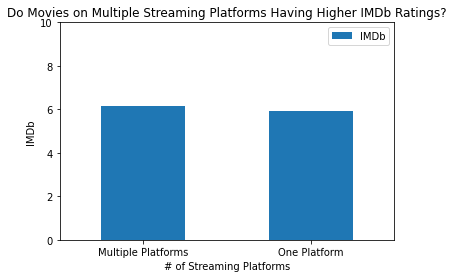

                                 IMDb
Multiple Steaming Platforms          
Multiple Platforms           6.134084
One Platform                 5.893499


In [13]:
platforms_df = movie_dataset.copy()

platforms_df['No. Streaming Platforms'] = platforms_df['Netflix']+platforms_df['Hulu']+platforms_df['Disney+']+platforms_df['Prime Video']
platforms_df['Multiple Steaming Platforms'] = np.where(platforms_df['No. Streaming Platforms'] == 1, 'One Platform', 'Multiple Platforms')

platforms_groupby = platforms_df.groupby('Multiple Steaming Platforms')[['IMDb']].mean()


platforms_groupby.plot(kind='bar', rot=.1)
plt.title('Do Movies on Multiple Streaming Platforms Having Higher IMDb Ratings?')
plt.ylabel('IMDb')
plt.xlabel('# of Streaming Platforms')
plt.ylim(0,10)

plt.show()

print(platforms_groupby)


#### NOTES ####

# Based on this graph it's looking like there's not a huge difference in rating if movies 
# have been on multiple platforms vs just one

# Could be interesting to add a couple graphs by Popular Genres to see if that makes any difference



In [14]:
#This block is for Davids code

In [15]:
davids_dataset = movie_dataset.copy()

In [16]:
#This block is for Matts code

In [17]:
matts_dataset = movie_dataset.copy()